In [185]:
# =============================================================================
# DA TASK 2
# ============================================================================
# Author : Ragini Mahajan
# Created On : 2025-12-17
# Description :
# This script performs an end-to-end data analysis workflow on
# vehicle repair and complaint data to generate business insights.
#=============================================================================

import pandas as pd
import numpy as np

In [138]:
np.set_printoptions(suppress = True, linewidth = 150)

In [149]:
# ================================================
# STAGE 1:IMPORTING EXCEL DATA AND COLUMN ANALYSIS
# ================================================
DA_task_2 = pd.read_excel("C:/Users/Ragini/Downloads/DA -Task 2._Ragini_Mahajan_2.xlsx")
DA_task_2


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2822282187,6,1,N,6MB26,NaN,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


In [150]:
data_types_columns= print(DA_task_2.dtypes)
data_types_columns

VIN                                      object
TRANSACTION_ID                            int64
CORRECTION_VERBATIM                      object
CUSTOMER_VERBATIM                        object
REPAIR_DATE                      datetime64[ns]
CAUSAL_PART_NM                           object
GLOBAL_LABOR_CODE_DESCRIPTION            object
PLATFORM                                 object
BODY_STYLE                               object
VPPC                                     object
PLANT                                    object
BUILD_COUNTRY                            object
LAST_KNOWN_DLR_NAME                      object
LAST_KNOWN_DLR_CITY                      object
REPAIRING_DEALER_CODE                    object
DEALER_NAME                              object
REPAIR_DLR_CITY                          object
STATE                                    object
DEALER_REGION                             int64
REPAIR_DLR_POSTAL_CD                     object
REPAIR_AGE                              

In [151]:
DA_task_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [152]:
unique_values_dict = {column: DA_task_2[column].unique() for column in DA_task_2.columns}
unique_values_dict

{'VIN': array(['3HCFDDE89SH220903', '1HRFFEE8XSZ230636', '1HYKSMRK6SZ000990', '3HCFDFEL3SH241701', '1HRFFHEL1RZ181474', '3HRFFHED7RH167541',
        '1HRFFHEL4RZ149960', '3HCFDFED4SH352945', '1HRF9CED6NZ221061', '1HRFFHEL8RZ133325', '1HCFDHE86SZ274242', '1HYKNDRS3MZ177921',
        '1HYKSMRK4SZ001121', '1H6DS5RK6S0127345', '1HC4YSEY3RF110164', '1HKS1JKL0SR282668', '1HC4Y9EY2MF192148', '1H1FZ6S00N4109597',
        '1HNEVKKW6SJ216435', '1HR49WEY2NF322460', '3HRFFCER3NH528824', '1HYKNDR46NZ151056', '1HNEVNKW4SJ144359', '3HRS9EED0LH255650',
        '1HKS2JKR2NR336997', '1HCFDEED3SZ308171', '1HYKNHRS1LZ157005', '1HCFYEED6NZ182017', '1HCFDEED5SZ117691', '3HNKBHRS8SS220860',
        '1HR49SE7XRF103023', '3HRFFEE82RH175165', '3HCND9ED5SH144160', '1HYKSSRL1RZ101481', '1HR49REY4SF251024', '3HCFDFED5SH364828',
        '2HC4YSEY1S1701193', '1HKS2JKL9MR285352', '1HNSKRKD0RR120386', '1HCFDEER5NZ580922', '1HRS9EED3MZ313803', '2HCFDEED4R1147650',
        '1HR49XEY0RF190021', '1HR19SEY5RF265525', '1HCF

In [153]:
unique_distribution = DA_task_2.nunique()
unique_distribution

VIN                               98
TRANSACTION_ID                    32
CORRECTION_VERBATIM               93
CUSTOMER_VERBATIM                100
REPAIR_DATE                       29
CAUSAL_PART_NM                    18
GLOBAL_LABOR_CODE_DESCRIPTION      4
PLATFORM                          11
BODY_STYLE                         6
VPPC                              26
PLANT                             11
BUILD_COUNTRY                      3
LAST_KNOWN_DLR_NAME              100
LAST_KNOWN_DLR_CITY               94
REPAIRING_DEALER_CODE             95
DEALER_NAME                      100
REPAIR_DLR_CITY                   93
STATE                             39
DEALER_REGION                      2
REPAIR_DLR_POSTAL_CD              92
REPAIR_AGE                        35
KM                               100
COMPLAINT_CD_CSI                   1
COMPLAINT_CD                       7
VEH_TEST_GRP                      23
COUNTRY_SALE_ISO                   6
ORD_SELLING_SRC_CD                 7
O

In [154]:
## ==============================
# STAGE 2: DATA CLEANING
# ==============================
Missing_values = print("Missing values per column:")
print(DA_task_2.isnull().sum())
Missing_values

Missing values per column:
VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING

In [155]:
for column in DA_task_2.columns:
    dtype = DA_task_2[column].dtype


In [156]:
# ==============================
# STAGE 2.1: FILLING MISSING/INVALID VALUES
# ==============================
if pd.api.types.is_numeric_dtype(dtype):
    DA_task_2[column] = DA_task_2[column].fillna(DA_task_2[column].mean())
elif pd.api.types.is_string_dtype(dtype) or pd.api.types.is_categorical_dtype(dtype):
    mode_value = DA_task_2[column].mode()[0] if not DA_task_2[column].mode().empty else "Unknown"
    DA_task_2[column] = DA_task_2[column].fillna(mode_value)
elif pd.api.types.is_datetime64_dtype(dtype):
        DA_task_2[column] = DA_task_2[column].fillna(method='ffill')
        
else:
        DA_task_2[column] = DA_task_2[column].fillna("Unknown")            

    
    

In [158]:
Invalid_values = print("Invalid values per column:")
print(DA_task_2.isna().sum())
Invalid_values

Invalid values per column:
VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING

In [159]:
fill_map = {
    'VIN': 'Unknown',
    'TRANSACTION_ID': 'Unknown',
    'CORRECTION_VERBATIM': 'Not Recorded',
    'CUSTOMER_VERBATIM': 'Not Recorded',
    'REPAIR_DATE': 'Unknown',
    'CAUSAL_PART_NM': 'Unknown',
    'GLOBAL_LABOR_CODE_DESCRIPTION': 'Unknown',
    'PLATFORM': 'Unknown',
    'BODY_STYLE': 'Unknown',
    'VPPC': 'Unknown',
    'PLANT': 'Unknown',
    'BUILD_COUNTRY': 'Unknown',
    'LAST_KNOWN_DLR_NAME': 'Unknown',
    'LAST_KNOWN_DLR_CITY': 'Unknown',
    'REPAIRING_DEALER_CODE': 'Unknown',
    'DEALER_NAME': 'Unknown',
    'REPAIR_DLR_CITY': 'Unknown',
    'STATE': 'Unknown',
    'DEALER_REGION': 'Unknown',
    'REPAIR_DLR_POSTAL_CD': 'Unknown',
    'REPAIR_AGE': 'Unknown',
    'KM': 'Not recorded',
    'COMPLAINT_CD_CSI': 'Unknown',
    'COMPLAINT_CD': 'Unknown',
    'VEH_TEST_GRP': 'Unknown',
    'COUNTRY_SALE_ISO': 'Unknown',
    'ORD_SELLING_SRC_CD': 'Unknown',
    'OPTN_FAMLY_CERTIFICATION': 'Unknown',
    'OPTF_FAMLY_EMISSIOF_SYSTEM': 'Unknown',
    'GLOBAL_LABOR_CODE': 'Unknown',
    'TRANSACTION_CATEGORY': 'Unknown',
    'CAMPAIGN_NBR': 'Unknown',
    'REPORTING_COST': 'Unknown',
    'TOTALCOST': 'Unknown',
    'LBRCOST': 'Unknown',
    'ENGINE': 'Unknown',
    'ENGINE_DESC': 'Not  Recorded',
    'TRANSMISSION': 'Unknown',
    'TRANSMISSION_DESC': 'Unknown',
    'ENGINE_SOURCE_PLANT': 'Unknown',
    'ENGINE_TRACE_NBR': 'Unknown',
    'TRANSMISSION_SOURCE_PLANT': 'Unknown',
    'TRANSMISSION_TRACE_NBR': 'Unknown',
    'SRC_TXN_ID': 'Unknown',
    'SRC_VER_NBR': 'Unknown',
    'TRANSACTION_CNTR': 'Unknown',
    'MEDIA_FLAG': 'Unknown',
    'VIN_MODL_DESGTR': 'Unknown',
    'LINE_SERIES': 'Unknown',
    'LAST_KNOWN_DELVRY_TYPE_CD': 'Unknown',
    'NON_CAUSAL_PART_QTY': 'Unknown',
    'SALES_REGION_CODE': 'Unknown'              
}

for col, value in fill_map.items():
    DA_task_2[col] = DA_task_2[col].where(DA_task_2[col].notna(), value)

In [160]:
Invalid_values = print("Invalid values per column:")
print(DA_task_2.isna().sum())
Invalid_values

Invalid values per column:
VIN                              0
TRANSACTION_ID                   0
CORRECTION_VERBATIM              0
CUSTOMER_VERBATIM                0
REPAIR_DATE                      0
CAUSAL_PART_NM                   0
GLOBAL_LABOR_CODE_DESCRIPTION    0
PLATFORM                         0
BODY_STYLE                       0
VPPC                             0
PLANT                            0
BUILD_COUNTRY                    0
LAST_KNOWN_DLR_NAME              0
LAST_KNOWN_DLR_CITY              0
REPAIRING_DEALER_CODE            0
DEALER_NAME                      0
REPAIR_DLR_CITY                  0
STATE                            0
DEALER_REGION                    0
REPAIR_DLR_POSTAL_CD             0
REPAIR_AGE                       0
KM                               0
COMPLAINT_CD_CSI                 0
COMPLAINT_CD                     0
VEH_TEST_GRP                     0
COUNTRY_SALE_ISO                 0
ORD_SELLING_SRC_CD               0
OPTN_FAMLY_CERTIFICATION    

In [161]:
DA_task_2['CORRECTION_VERBATIM'] = DA_task_2['CORRECTION_VERBATIM'].str.strip().str.capitalize()
DA_task_2['CORRECTION_VERBATIM']
DA_task_2['CUSTOMER_VERBATIM'] = DA_task_2['CUSTOMER_VERBATIM'].str.strip().str.capitalize()
DA_task_2['CUSTOMER_VERBATIM']

0                           Steering wheel coming apart
1            Customer states heated steering wheel inop
2     Owner reports: the super cruise bar on the ste...
3     Customer states the lettering and finish on th...
4     C/s: customer states the service driver assist...
                            ...                        
95    Customer states that the steering is very tigh...
96    Cs driver assistance warning light is coming o...
97    Customer statescustomer states vehicle steerin...
98    Customer states there is clicking type noise c...
99    11buz minor electrical cust states stitching c...
Name: CUSTOMER_VERBATIM, Length: 100, dtype: object

In [162]:
DA_task_2['LINE_SERIES']

0        1500
1        1500
2       Lux-1
3        1500
4        1500
       ...   
95      Sport
96    Unknown
97     Denali
98       2500
99     Denali
Name: LINE_SERIES, Length: 100, dtype: object

In [166]:
# ====================================================================
# STAGE 3: FLAGGING OF INVALID/NON-ENCODED VALUES IN A SEPERATE COLUMN
# ====================================================================
DA_task_2['ENCODING_ISSUE_FLAG'] = DA_task_2['CUSTOMER_VERBATIM'].str.contains(
    r'�+',
    regex=True,
    na=False
)
DA_task_2['ENCODING_ISSUE_FLAG'][16]

np.True_

In [167]:
# =====================================================
# STAGE 4:EXPORTING CLEANED DATASET TO A NEW EXCEL FILE
# =====================================================
DA_task_2_cleaned = DA_task_2.to_excel(
    "C:/Users/Ragini/Downloads/DA -Task 2._Ragini_Mahajan_2.xlsx",
    index=False
)


In [168]:
DA_task_2

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,ENCODING_ISSUE_FLAG
0,3HCFDDE89SH220903,13021,Replaced steering wheel now okay,Steering wheel coming apart,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2808908219,6,1,N,CF10543,1500,21.0,0,1,False
1,1HRFFEE8XSZ230636,13028,Checked - found dtc's u0229 - u1530 set in bcm...,Customer states heated steering wheel inop,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,2808841910,6,1,Y,TF10543,1500,10.0,0,1,False
2,1HYKSMRK6SZ000990,13035,Approved 4.9(olh) for added diagnostics with t...,Owner reports: the super cruise bar on the ste...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1,False
3,3HCFDFEL3SH241701,13021,Steering wheel replacement,Customer states the lettering and finish on th...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2808892288,6,1,Y,CF10543,1500,10.0,0,1,False
4,1HRFFHEL1RZ181474,13021,Replaced steering message no longer displayed,C/s: customer states the service driver assist...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,2808901882,8,1,N,TF10543,1500,10.0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,Replaced steering wheel completedlop 0130 time .4,Customer states that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1,False
96,1HYKSSRL4SZ003381,13048,Replace steering wheel,Cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,2822282187,6,1,N,6MB26,Unknown,10.0,0,1,False
97,1HKKNXLS3SZ128369,13044,Replace steering wheel pra 496735300000,Customer statescustomer states vehicle steerin...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,2822042248,4,1,N,TNN26,Denali,10.0,0,1,False
98,1HC4WLE78RF260518,13045,Removed steering wheel and disassembled and fo...,Customer states there is clicking type noise c...,2024-02-07,Unknown,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,2820879999,6,1,N,CC20943,2500,14.0,0,1,False


In [170]:
TEXT_COLS = ["CUSTOMER_VERBATIM", "CORRECTION_VERBATIM"]

DA_task_2["FULL_TEXT"] = (
    DA_task_2["CUSTOMER_VERBATIM"].fillna("") + " " +
    DA_task_2["CORRECTION_VERBATIM"].fillna("")
).str.lower()
DA_task_2

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,ENCODING_ISSUE_FLAG,FULL_TEXT
0,3HCFDDE89SH220903,13021,Replaced steering wheel now okay,Steering wheel coming apart,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,6,1,N,CF10543,1500,21.0,0,1,False,steering wheel coming apart replaced steering ...
1,1HRFFEE8XSZ230636,13028,Checked - found dtc's u0229 - u1530 set in bcm...,Customer states heated steering wheel inop,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,6,1,Y,TF10543,1500,10.0,0,1,False,customer states heated steering wheel inop che...
2,1HYKSMRK6SZ000990,13035,Approved 4.9(olh) for added diagnostics with t...,Owner reports: the super cruise bar on the ste...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,4,1,Y,6MB26,Lux-1,10.0,0,1,False,owner reports: the super cruise bar on the ste...
3,3HCFDFEL3SH241701,13021,Steering wheel replacement,Customer states the lettering and finish on th...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,6,1,Y,CF10543,1500,10.0,0,1,False,customer states the lettering and finish on th...
4,1HRFFHEL1RZ181474,13021,Replaced steering message no longer displayed,C/s: customer states the service driver assist...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,8,1,N,TF10543,1500,10.0,0,1,False,c/s: customer states the service driver assist...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,Replaced steering wheel completedlop 0130 time .4,Customer states that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,4,1,Y,6NJ26,Sport,15.0,1,1,False,customer states that the steering is very tigh...
96,1HYKSSRL4SZ003381,13048,Replace steering wheel,Cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,6,1,N,6MB26,Unknown,10.0,0,1,False,cs driver assistance warning light is coming o...
97,1HKKNXLS3SZ128369,13044,Replace steering wheel pra 496735300000,Customer statescustomer states vehicle steerin...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,4,1,N,TNN26,Denali,10.0,0,1,False,customer statescustomer states vehicle steerin...
98,1HC4WLE78RF260518,13045,Removed steering wheel and disassembled and fo...,Customer states there is clicking type noise c...,2024-02-07,Unknown,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,6,1,N,CC20943,2500,14.0,0,1,False,customer states there is clicking type noise c...


In [171]:
# =========================
# TAG DICTIONARIES
# =========================

FAILURE_CONDITION_TAGS = {
    "PEELING": ["peel", "peeling", "peeling off"],
    "STITCHING_COMING_APART": ["stitch", "stitching"],
    "LEATHER_FRAYING": ["fray", "fraying"],
    "TRIM_LIFTING": ["lifting", "lifted", "coming off"],
    "CHROME_CRACKED": ["chrome", "cracked"],
    "SURFACE_FINISH_DEGRADATION": ["finish", "coating", "wrap"],

    "HEATED_INOP": ["heated", "heat", "heater"],
    "INTERMITTENT_OPERATION": ["intermittent", "sometimes", "at times"],
    "MODULE_FAILURE": ["module", "dtc", "fault", "code"],
    "SOFTWARE_PROGRAMMING_REQUIRED": ["program", "reprogram", "calibration"],

    "HORN_INOP": ["horn"],
    "SWITCH_INOP": ["switch", "button"],
    "RUBBING_NOISE": ["noise", "rubbing", "squeak"],
    "LOOSE_COMPONENT": ["loose", "not secure"],
    "MISALIGNMENT": ["misaligned", "not aligned"]
}
COMPONENT_TAGS = {
    "STEERING_WHEEL_ASSEMBLY": ["steering wheel"],
    "STEERING_WHEEL_TRIM": ["trim", "bezel", "applique", "cover"],
    "STEERING_WHEEL_LEATHER": ["leather"],
    "STEERING_WHEEL_HARNESS": ["harness", "wiring"],
    "HEATED_STEERING_MODULE": ["heated", "heater", "module"],
    "HORN_SWITCH": ["horn"],
    "AIRBAG_TRIM": ["airbag"],
    "SUPER_CRUISE_BAR": ["super cruise"]
}

SYSTEM_TAGS = {
    "DRIVER_ASSIST": ["driver assist", "lane", "adas"],
    "SUPER_CRUISE": ["super cruise"],
    "ADAS_RELATED": ["driver assist", "super cruise"],
    "HEATED_FEATURE": ["heated"],
    "HORN_SYSTEM": ["horn"]
}

DOMAIN_TAGS = {
    "COSMETIC": ["peel", "stitch", "leather", "chrome", "finish", "wrap"],
    "FUNCTIONAL": ["inop", "not working", "doesnt work", "fault"],
    "ELECTRICAL": ["module", "dtc", "harness", "wiring"],
    "SOFTWARE": ["program", "reprogram", "calibration"],
    "MECHANICAL": ["loose", "noise", "rubbing", "misaligned"]
}


In [172]:
# =========================
# TAGGING FUNCTION
# =========================

def generate_tags(text, tag_dict):
    tags = []
    for tag, keywords in tag_dict.items():
        if any(k in text for k in keywords):
            tags.append(tag)
    return tags


In [173]:
# =========================
# APPLY TAGGING
# =========================

DA_task_2["FAILURE_CONDITION_TAGS"] = DA_task_2["FULL_TEXT"].apply(
    lambda x: generate_tags(x, FAILURE_CONDITION_TAGS)
)
DA_task_2["COMPONENT_TAGS"] = DA_task_2["FULL_TEXT"].apply(
    lambda x: generate_tags(x, COMPONENT_TAGS)
)

DA_task_2["SYSTEM_TAGS"] = DA_task_2["FULL_TEXT"].apply(
    lambda x: generate_tags(x, SYSTEM_TAGS)
)

DA_task_2["FAILURE_DOMAIN_TAGS"] = DA_task_2["FULL_TEXT"].apply(
    lambda x: generate_tags(x, DOMAIN_TAGS)
)

In [174]:
# =========================
# APPLY TAGGING
# =========================
def explode_and_count(col):
    return (
        DA_task_2.explode(col)
        .groupby(col)
        .size()
        .sort_values(ascending=False)
    )
failure_summary = explode_and_count("FAILURE_CONDITION_TAGS")
component_summary = explode_and_count("COMPONENT_TAGS")
system_summary = explode_and_count("SYSTEM_TAGS")
DA_task_2['FAILURE_CONDITION_TAGS'] = DA_task_2['FAILURE_CONDITION_TAGS'].replace(
   r'(�+|^\s*$)',
    'Not Provided',
    regex=True
)
DA_task_2['SYSTEM_TAGS'] = DA_task_2['SYSTEM_TAGS'].replace(
    r'(�+|^\s*$)',
    'Not Provided',
    regex=True
)
DA_task_2['FAILURE_DOMAIN_TAGS'] = DA_task_2['FAILURE_DOMAIN_TAGS'].replace(
     r'(�+|^\s*$)',
    'Not Provided',
    regex=True
)
DA_task_2['COMPONENT_TAGS'] = DA_task_2['COMPONENT_TAGS'].replace(
   r'(�+|^\s*$)',
    'Not Provided',
    regex=True
)



In [175]:
# ==============================================
#STAGE 5: EXPORT CLEANED AND TAGGED EXCEL FILE 
# ==============================================
DA_task_2_cleaned_tagged = DA_task_2.to_excel(
    "C:/Users/Ragini/Downloads/DA -Task 2._Ragini Mahajan_2.1.xlsx",
    index=False
)
DA_task_2

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,ENCODING_ISSUE_FLAG,FULL_TEXT,FAILURE_CONDITION_TAGS,COMPONENT_TAGS,SYSTEM_TAGS,FAILURE_DOMAIN_TAGS
0,3HCFDDE89SH220903,13021,Replaced steering wheel now okay,Steering wheel coming apart,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,1500,21.0,0,1,False,steering wheel coming apart replaced steering ...,[],[STEERING_WHEEL_ASSEMBLY],[],[]
1,1HRFFEE8XSZ230636,13028,Checked - found dtc's u0229 - u1530 set in bcm...,Customer states heated steering wheel inop,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,1500,10.0,0,1,False,customer states heated steering wheel inop che...,"[HEATED_INOP, MODULE_FAILURE]","[STEERING_WHEEL_ASSEMBLY, STEERING_WHEEL_HARNE...",[HEATED_FEATURE],"[FUNCTIONAL, ELECTRICAL]"
2,1HYKSMRK6SZ000990,13035,Approved 4.9(olh) for added diagnostics with t...,Owner reports: the super cruise bar on the ste...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,Lux-1,10.0,0,1,False,owner reports: the super cruise bar on the ste...,"[MODULE_FAILURE, SOFTWARE_PROGRAMMING_REQUIRED]","[STEERING_WHEEL_ASSEMBLY, HEATED_STEERING_MODU...","[SUPER_CRUISE, ADAS_RELATED]","[ELECTRICAL, SOFTWARE]"
3,3HCFDFEL3SH241701,13021,Steering wheel replacement,Customer states the lettering and finish on th...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,1500,10.0,0,1,False,customer states the lettering and finish on th...,"[TRIM_LIFTING, SURFACE_FINISH_DEGRADATION]",[STEERING_WHEEL_ASSEMBLY],[],[COSMETIC]
4,1HRFFHEL1RZ181474,13021,Replaced steering message no longer displayed,C/s: customer states the service driver assist...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,1500,10.0,0,1,False,c/s: customer states the service driver assist...,[],[],"[DRIVER_ASSIST, ADAS_RELATED]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,Replaced steering wheel completedlop 0130 time .4,Customer states that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,Sport,15.0,1,1,False,customer states that the steering is very tigh...,[RUBBING_NOISE],[STEERING_WHEEL_ASSEMBLY],[],[MECHANICAL]
96,1HYKSSRL4SZ003381,13048,Replace steering wheel,Cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,Unknown,10.0,0,1,False,cs driver assistance warning light is coming o...,[],[STEERING_WHEEL_ASSEMBLY],"[DRIVER_ASSIST, ADAS_RELATED]",[]
97,1HKKNXLS3SZ128369,13044,Replace steering wheel pra 496735300000,Customer statescustomer states vehicle steerin...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,Denali,10.0,0,1,False,customer statescustomer states vehicle steerin...,[],[STEERING_WHEEL_ASSEMBLY],[],[]
98,1HC4WLE78RF260518,13045,Removed steering wheel and disassembled and fo...,Customer states there is clicking type noise c...,2024-02-07,Unknown,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,2500,14.0,0,1,False,customer states there is clicking type noise c...,[RUBBING_NOISE],"[STEERING_WHEEL_ASSEMBLY, STEERING_WHEEL_TRIM]",[],[MECHANICAL]


C:\Users\Ragini\AppData\Local\Temp\ipykernel_10688\2617610970.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=DA_task_2, x='PLATFORM', palette='viridis', order=DA_task_2['PLATFORM'].value_counts().index)


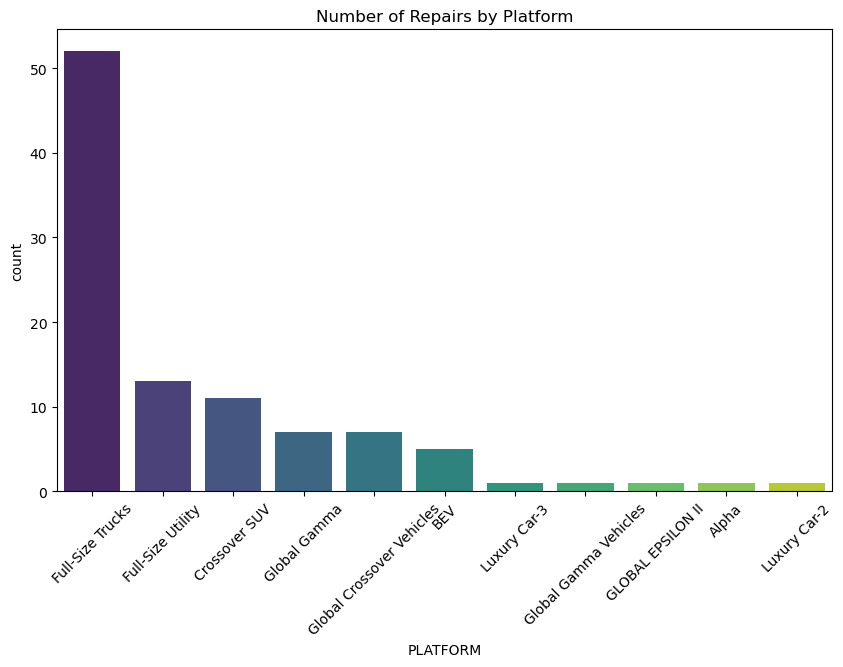

In [179]:
# =====================================
#STAGE 6: VISUALIZATIONS OF THE DATASET 
# =====================================
# --- Visualization 1: Repairs by Platform (Bar Chart) ---
# Purpose: Identify which platforms have the most repair issues
import matplotlib.pyplot as plt
import seaborn as sns
repairs_by_platform_chart = plt.figure(figsize=(10, 6))
sns.countplot(data=DA_task_2, x='PLATFORM', palette='viridis', order=DA_task_2['PLATFORM'].value_counts().index)
plt.title('Number of Repairs by Platform')
plt.xticks(rotation=45)
plt.show()

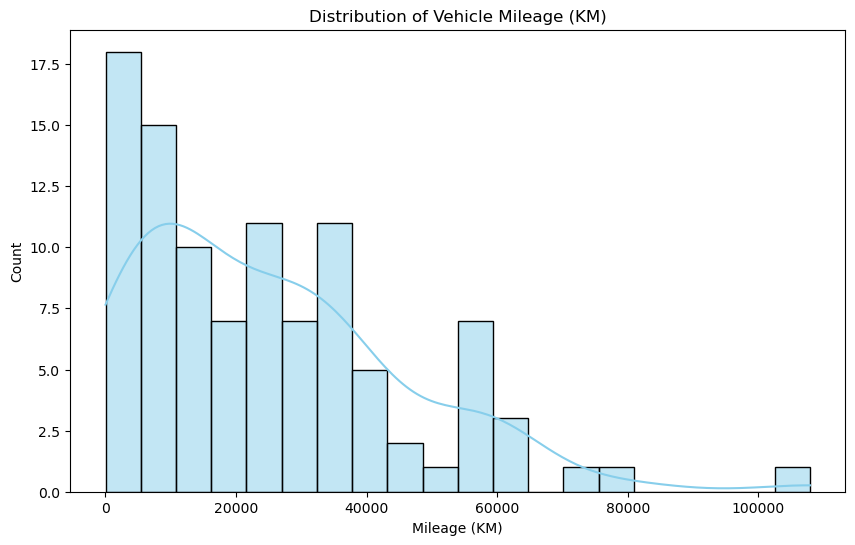

In [180]:
# Visualization 2: Distribution of Mileage (Histogram)
# Purpose: See the typical age/usage of vehicles when they need repair.
Distribution_of_Mileage_Histogram = plt.figure(figsize=(10, 6))
sns.histplot(DA_task_2['KM'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Vehicle Mileage (KM)')
plt.xlabel('Mileage (KM)')
plt.show()

In [181]:
# 2. Data Cleaning: Convert 'TOTALCOST' to numeric (handles 'Unknown' as NaN)
DA_task_2['TOTALCOST'] = pd.to_numeric(DA_task_2['TOTALCOST'], errors='coerce')
DA_task_2_visual_clean = DA_task_2.dropna(subset=['TOTALCOST'])

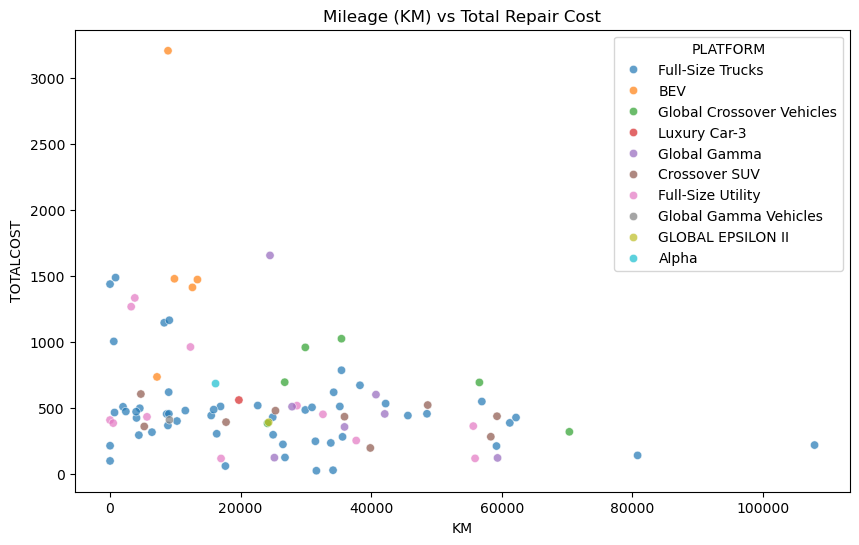

In [182]:
# Visualization 5: Mileage vs. Total Cost (Scatter Plot)
# Purpose: Check if there is a correlation between vehicle usage and repair expense.
Mileage_vs_Total_Cost_Scatter_Plot = plt.figure(figsize=(10, 6))
sns.scatterplot(data=DA_task_2_visual_clean , x='KM', y='TOTALCOST', hue='PLATFORM', alpha=0.7)
plt.title('Mileage (KM) vs Total Repair Cost')
plt.show()

C:\Users\Ragini\AppData\Local\Temp\ipykernel_10688\1093680884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='magma')


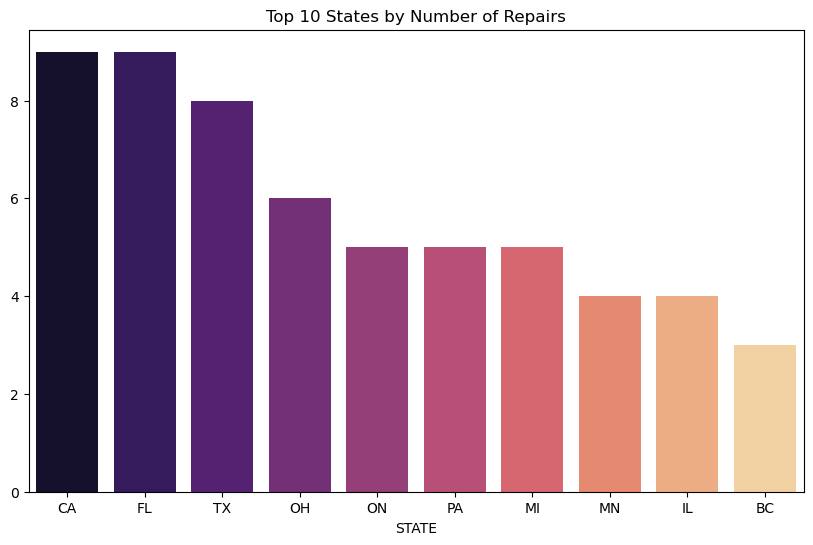

In [183]:
# --- Visualization 3: Top 10 States with Repairs (Bar Chart) 
# Purpose: Geographical distribution of repair incidents.
Top_10_States_with_repairs_Bar_Chart = plt.figure(figsize=(10, 6))
state_counts = DA_task_2['STATE'].value_counts().head(10)
sns.barplot(x=state_counts.index, y=state_counts.values, palette='magma')
plt.title('Top 10 States by Number of Repairs')
plt.show()

C:\Users\Ragini\AppData\Local\Temp\ipykernel_10688\1422667393.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=DA_task_2_visual_clean , x='BODY_STYLE', y='TOTALCOST', palette='Set2')


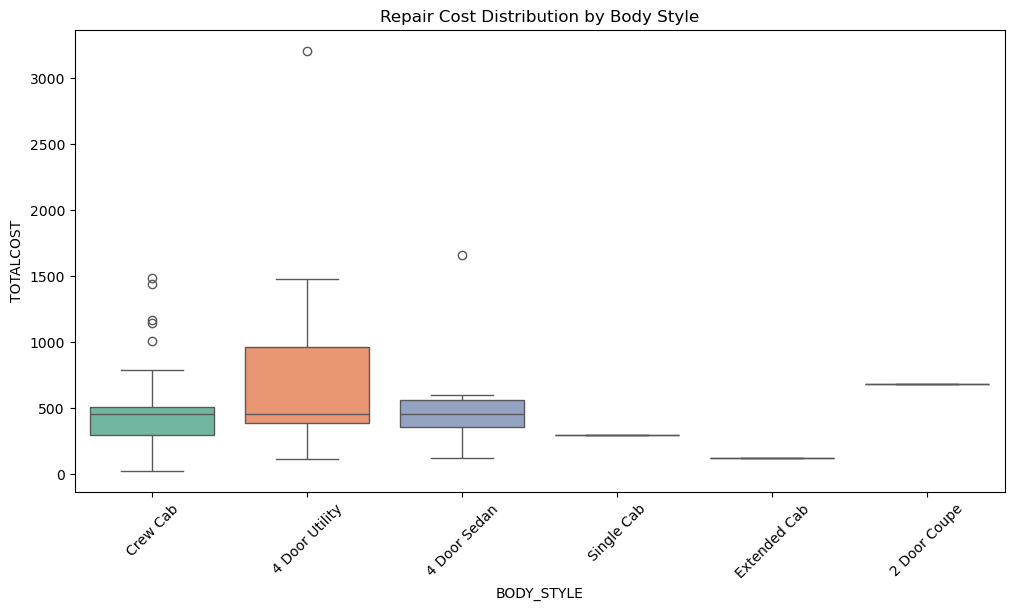

In [184]:
# Visualization 4: Repair Cost by Body Style (Box Plot)
# Purpose: Compare the spread and median cost of repairs for different vehicle shapes.
Repair_Cost_by_Body_Style_Box_Plot = plt.figure(figsize=(12, 6))
sns.boxplot(data=DA_task_2_visual_clean , x='BODY_STYLE', y='TOTALCOST', palette='Set2')
plt.title('Repair Cost Distribution by Body Style')
plt.xticks(rotation=45)
plt.show()